<a href="https://colab.research.google.com/github/saketh105/DATA603/blob/main/Assignment03/Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

## installing pyspark

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 22.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=781e41060835966f269b425e147574cd326a8b0dcef63598468579e9626cfdd4
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
import pyspark

In [ ]:
from pyspark.sql import SparkSession

## setting the Spark configuration

In [ ]:
MAX_MEMORY = '12G'
conf = pyspark.SparkConf().setMaster("local[*]").set('spark.executor.heartbeatInterval', 10000).set('spark.network.timeout', 10000).set("spark.core.connection.ack.wait.timeout", "3600").set("spark.executor.memory", MAX_MEMORY).set("spark.driver.memory", MAX_MEMORY)

## creating a session

In [ ]:
session = SparkSession.builder.appName('Assignment3 Chicago Crime Data').config(conf=conf).getOrCreate()

## Define the schema for loading the Chicago crime dataset

In [ ]:
#Define the schema for loading the Chicago crime dataset
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType, DoubleType, TimestampType
# Define the schema for the Chicago crime dataset
crime_schema = StructType([
    StructField("ID", IntegerType(), True),
    StructField("Case Number", StringType(), True),
    StructField("Date", TimestampType(), True),
    StructField("Block", StringType(), True),
    StructField("IUCR", StringType(), True),
    StructField("Primary Type", StringType(), True),
    StructField("Description", StringType(), True),
    StructField("Location Description", StringType(), True),
    StructField("Arrest", BooleanType(), True),
    StructField("Domestic", BooleanType(), True),
    StructField("Beat", IntegerType(), True),
    StructField("District", IntegerType(), True),
    StructField("Ward", IntegerType(), True),
    StructField("Community Area", IntegerType(), True),
    StructField("FBI Code", StringType(), True),
    StructField("X Coordinate", DoubleType(), True),
    StructField("Y Coordinate", DoubleType(), True),
    StructField("Year", IntegerType(), True),
    StructField("Updated On", TimestampType(), True),
    StructField("Latitude", DoubleType(), True),
    StructField("Longitude", DoubleType(), True),
    StructField("Location", StringType(), True)
])

## Load the CSV file

In [83]:

crime_df = session.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load("/content/Crimes_2001_to_Present.csv")

## Load the Chicago crime data

In [ ]:

crime_df.show(10)

+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE|

In [ ]:
print(crime_df.printSchema())


root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)

None


In [ ]:
from pyspark.sql.functions import *

## dropping null values

In [ ]:

crime_df=crime_df.dropna()

In [ ]:

crime_df.count()

597614

In [ ]:
crime_df.select('Date').show(5, truncate=False)

+----------------------+
|Date                  |
+----------------------+
|09/05/2015 01:30:00 PM|
|09/04/2015 11:30:00 AM|
|09/05/2015 12:45:00 PM|
|09/05/2015 01:00:00 PM|
|09/05/2015 10:55:00 AM|
+----------------------+
only showing top 5 rows



##  change 'Date' column data type

In [84]:
crime_df=crime_df.withColumn("date",to_timestamp("date", format = 'MM/dd/yyyy hh:mm:ss a'))

In [85]:
crime_df.select('Date').dtypes

[('Date', 'timestamp')]

 ## filter the data for last ten years


In [87]:
cdf1 = crime_df.filter((crime_df.Year <= 2022) & (crime_df.Year > 2012))

In [ ]:
cdf1.select('Primary Type').distinct().show(truncate=False)

+--------------------------------+
|Primary Type                    |
+--------------------------------+
|OFFENSE INVOLVING CHILDREN      |
|CRIMINAL SEXUAL ASSAULT         |
|STALKING                        |
|PUBLIC PEACE VIOLATION          |
|OBSCENITY                       |
|NON-CRIMINAL (SUBJECT SPECIFIED)|
|ARSON                           |
|GAMBLING                        |
|CRIMINAL TRESPASS               |
|ASSAULT                         |
|NON - CRIMINAL                  |
|LIQUOR LAW VIOLATION            |
|MOTOR VEHICLE THEFT             |
|THEFT                           |
|BATTERY                         |
|ROBBERY                         |
|HOMICIDE                        |
|PUBLIC INDECENCY                |
|CRIM SEXUAL ASSAULT             |
|HUMAN TRAFFICKING               |
+--------------------------------+
only showing top 20 rows



##  remove all the records with the following crime types

In [ ]:
cdf1 = cdf1.filter(~col("Primary Type").isin("NON-CRIMINAL (SUBJECT SPECIFIED)", 
                                                         "OTHER OFFENSE", 
                                                         "STALKING", 
                                                         "NON - CRIMINAL", 
                                                         "ARSON"))

## merge the similar crime types

In [ ]:
cdf1= cdf1.withColumn("Primary Type", when(cdf1['Primary Type'] == "CRIM SEXUAL ASSAULT", "SEXUAL ASSAULT")
                    .when(cdf1['Primary Type'] == "CRIMINAL SEXUAL ASSAULT", "SEXUAL ASSAULT")
                    .when(cdf1['Primary Type'] == "SEX OFFENSE", "SEXUAL OFFENSE")
                    .when(cdf1['Primary Type'] == "PROSTITUTION", "SEXUAL OFFENSE")
                    .when(cdf1['Primary Type'] == "BURGLARY", "THEFT")
                    .when(cdf1['Primary Type'] == "THEFT", "THEFT")
                    .when(cdf1['Primary Type'] == "ROBBERY", "THEFT")
                    .when(cdf1['Primary Type'] == "PUBLIC PEACE VIOLATION", "PUBLIC OFFENSE")
                    .when(cdf1['Primary Type'] == "PUBLIC INDECENCY", "PUBLIC OFFENSE")
                    .otherwise(cdf1['Primary Type']))

In [ ]:
cdf1.select('Primary Type').distinct().show(truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|OFFENSE INVOLVING CHILDREN       |
|OBSCENITY                        |
|SEXUAL OFFENSE                   |
|GAMBLING                         |
|CRIMINAL TRESPASS                |
|ASSAULT                          |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|THEFT                            |
|PUBLIC OFFENSE                   |
|BATTERY                          |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTIMIDATION                     |
|DECEPTIVE PRACTICE               |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIMINAL DAMAGE                  |
|SEXUAL ASSAULT                   |
|NARCOTICS                        |
|NON-CRIMINAL                     |
+---------------------------------+
only showing top 20 rows




## year-wise trend of the crime for last ten years

In [88]:
import pyspark.sql.functions as F

cdf1.groupBy(F.year("Date").alias("Year")).count().orderBy("Year").show()



+----+------+
|Year| count|
+----+------+
|2013|   646|
|2014|  1500|
|2015|166365|
|2016|261932|
|2017|261391|
|2018|261030|
|2019|121279|
|2020| 17340|
|2021|  2591|
|2022|  1237|
+----+------+



## which hour of the day crime is highest

In [99]:

cdf1.groupBy(F.hour("Date").alias("Hour")).count().orderBy(col("count").desc()).show(5)

+----+-----+
|Hour|count|
+----+-----+
|  12|65760|
|  18|63238|
|  19|62152|
|  15|60171|
|  17|59688|
+----+-----+
only showing top 5 rows



## visualizing 

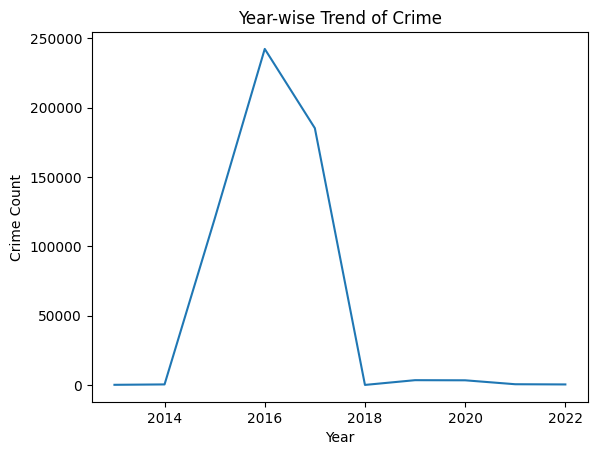

In [76]:
import matplotlib.pyplot as plt
import pyspark.sql.functions as F

# year-wise trend of the crime for last ten years
crime_data_year = cdf1.groupBy(F.year("Date").alias("Year")).count().orderBy("Year").toPandas()

plt.plot(crime_data_year["Year"], crime_data_year["count"])
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.title('Year-wise Trend of Crime')
plt.show()

In [93]:
cdf1 = cdf1.withColumn("hour", hour(cdf1.date))

In [96]:
hourdf = cdf1.groupby('hour').count().sort('count',ascending=False).toPandas()

<Axes: xlabel='hour'>

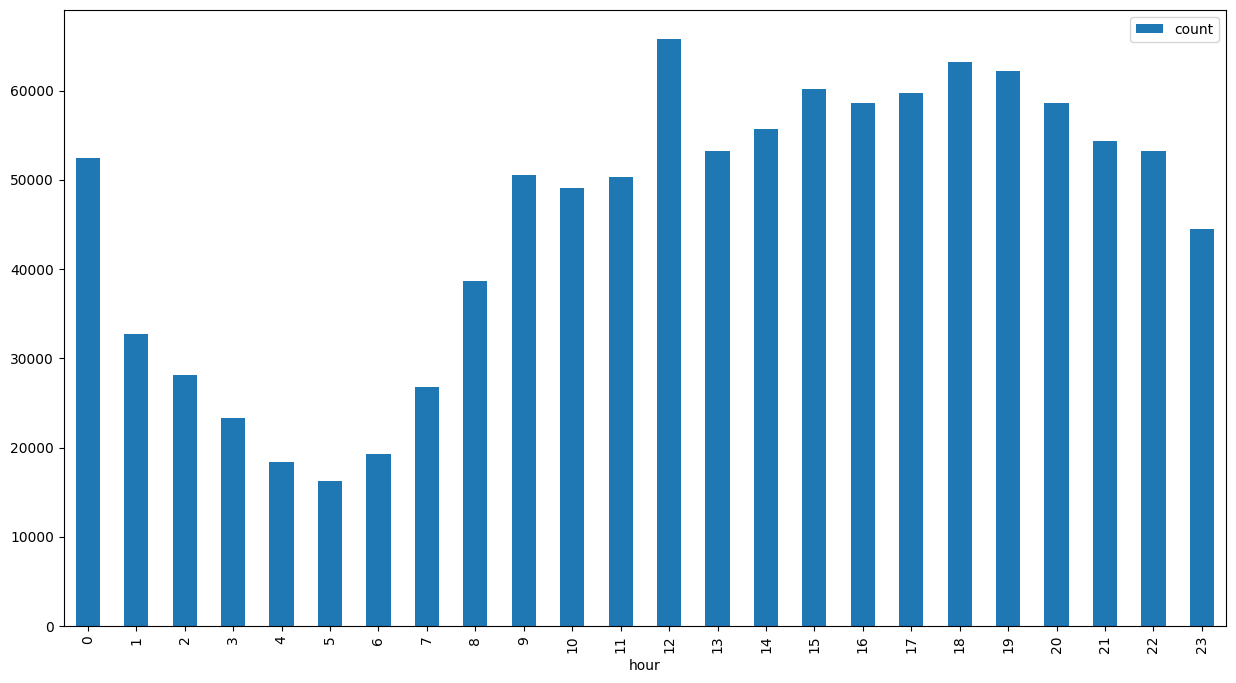

In [97]:
hourdf.sort_values('hour').plot(kind='bar',x='hour',y='count', figsize = (15,8))